## Machine Learning - Outliers
### Part B, Removing Outliers from Point Sets

This exercise deals with handling outliers from point sets within the Enron dataset.   
The task is to identify erroneous points that may occur as a result of copied tables and discuss
anomalies from data entry or recording errors.  

#### The first task looks at identifying the largest value for bonus in the dictionary feature set
Which is related to an entry titled 'TOTAL', which is inconsistent with the other feature set labels that consist of employee names.  Likely a data table copying error.

#### The second part looks at identifying anomalies

Here the employees with exceptionaly large bonus and salary appear as outliers relative to the rest of the dataset.  These data points are valid and the executives receiving the compensation would be anomalies relative to the bulk of employees within the dataset.

In [2]:
%matplotlib inline
import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
import numpy as np

#### Create a function for plotting dictionary item values

In [3]:
def plot_dict (data):
    for point in data:
        salary = point[0]
        bonus = point[1]
        matplotlib.pyplot.scatter( salary, bonus )

    matplotlib.pyplot.xlabel("salary")
    matplotlib.pyplot.ylabel("bonus")
    matplotlib.pyplot.title("Enron Employee Bonus and Salary data")
    matplotlib.pyplot.show()

Max Salary 26704229.0
Max Bonus 97343619.0


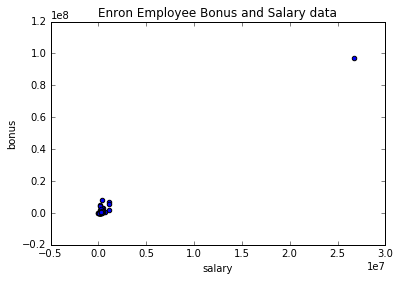

First pass outlier removal
Found them :  TOTAL
Removing TOTAL from dataset


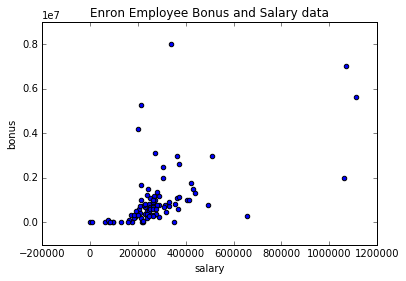

Searching for remaining outliers..
Found them :  LAY KENNETH L Salary 1072321 bonus 7000000
Found them :  SKILLING JEFFREY K Salary 1111258 bonus 5600000


In [6]:
### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )

features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

print 'Max Salary',np.max(data[:,0])
max_salary = np.max(data[:,0])
print 'Max Bonus',np.max(data[:,1])
max_bonus = np.max(data[:,1])

plot_dict(data)

print 'First pass outlier removal'
for ppl in data_dict.keys():
    if(data_dict[ppl]['salary']==max_salary and data_dict[ppl]['bonus']==max_bonus):
        print 'Found them : ',ppl
        remove_item = ppl
      
print 'Removing',remove_item,'from dataset'
# Remove the outlier
data_dict.pop(remove_item,0)
# Reset data to cleaned set
data = featureFormat(data_dict, features)

plot_dict(data)

bandits = []
print 'Searching for remaining outliers..'
for ppl in data_dict.keys():
    if(data_dict[ppl]['salary'] != 'NaN' and data_dict[ppl]['bonus'] != 'NaN'):
        if((data_dict[ppl]['salary']>1000000) and (data_dict[ppl]['bonus']>5000000)):
            print 'Found them : ',ppl,'Salary',data_dict[ppl]['salary'],'bonus',data_dict[ppl]['bonus'] 
            bandits += ppl
            
